# Keras With TensorFlow Prerequisites

* Keras artık TensorFlow ile birlikte geldiği için, TensorFlow'u şu komutla kurabiliriz
    
    
    !pip install tensorflow

Before TensorFlow Integration

In [ ]:
from keras.layers import Dense
import keras
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D

After TensorFlow Integration

In [ ]:
from tensorflow.keras.layers import Dense
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, BatchNormalization, Conv2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#------------------
import pandas as pd
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

# TensorFlow And Keras GPU Support

* TensorFlow GPU desteği şuanda CUDA özellikli kartlara sahip Ubuntu ve Windows sistemleri için mevcuttur.
* TensorFlow kodları varsayılan olarak GPU'da çalıştıracaktır.
* Bu nedenle, TensorFlow hem CPU hem de GPU algılarsa kod varsayılan olarak GPU'da çalışır.

# Data Processing For Neural Network Training

* Herhangi bir sinir ağını denetimli bir öğrenme görevinde eğitmek için önce bir örnek veri setine ve bu örnekler için karşılık gelen etiketlere ihtiyacımız var.
* Sequential model, model üzerinde fit() işlevini çağırdığımızda başlayan eğitim işemi sırasında veriye ihtiyac duyar. Bu nedenle, bu fonksiyonun beklediği veri türünü kontrol etmek gerekiyor.

* A Numpy array (or array-like), or a list of arrays (in case the model has multiple inputs).
* A TensorFlow tensor, or a list of tensors (in case the model has multiple inputs).
* A dict mapping input names to the corresponding array/tensors, if the model has named inputs.
* A tf.data dataset. Should return a tuple of either (inputs, targets) or (inputs, targets, sample_weights).
* A generator or keras.utils.Sequence returning (inputs, targets) or (inputs, targets, sample_weights).

* https://www.tensorflow.org/api_docs/python/tf/keras/Sequential#fit

In [ ]:
#deneysel bir ilacın klinik bir denemede 13 ila 100 yaş aralığındaki bireyler üzerinde test edildiğini varsayalım. 
#Deneme 2100 katılımcı vardı. Katılımcıların yarısı 65 yaşın altında, diğer yarısı 65 yaş ve üzerindeydi.
#Deneme, 65 yaş ve üstü hastaların yaklaşık %95'inin ilaçtan yan etkiler yaşadığını ve 
#65 yaşın altındaki hastaların yaklaşık %95'inin hiçbir yan etki yaşamadığını gösterdi, 
#bu da genellikle yaşlı bireylerin yan etkilere maruz kalma olasılığının daha yüksek olduğunu gösterdi.

train_labels = []
train_samples = []

for i in range(50):
    # Yan etkiler yaşayan genç bireylerin % 5'i
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(1)

    # Yan etki yaşamayan yaşlı bireylerin %5'i
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(0)

for i in range(1000):
    # Yan etki yaşamayan genç bireylerin %95'i
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(0)

    # Yan etkiler yaşayan yaşlı bireylerin %95'i
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(1)

In [ ]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)
train_labels, train_samples = shuffle(train_labels, train_samples)

* Tüm verileri 13 ile 100 arasında değişen bir ölçekten 0 ile 1 arasında olacak şekilde ölçeklendirmek için scikit-learn'in MinMaxScaler sınıfını kullanacağız.


In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1,1))

# Create An Artificial Neural Network With TensorFlow's Keras API

In [ ]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Avaible :" ,len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0],True)

Num GPUs Avaible : 1


In [ ]:
model = Sequential([ #Sıralı Model
                    Dense(units=16,input_shape=(1,),activation="relu"),#Hidden Layers
                    Dense(units=32,activation="relu"),
                    Dense(units=2,activation="softmax")
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


# Train An Artificial Neural Network

In [ ]:
model.compile(optimizer=Adam(learning_rate = 0.0001),loss="sparse_categorical_crossentropy",metrics=["accuracy"]) #Modelin hazırlanması ve gerekli parametrelerin belirlenmesi

In [ ]:
model.fit(x=scaled_train_samples,y=train_labels,batch_size=10,validation_split=0.1,epochs=30,shuffle=True,verbose=2)

Epoch 1/30
189/189 - 3s - loss: 0.6989 - accuracy: 0.4407 - val_loss: 0.6818 - val_accuracy: 0.5000
Epoch 2/30
189/189 - 0s - loss: 0.6684 - accuracy: 0.5296 - val_loss: 0.6531 - val_accuracy: 0.5524
Epoch 3/30
189/189 - 0s - loss: 0.6389 - accuracy: 0.6159 - val_loss: 0.6175 - val_accuracy: 0.6905
Epoch 4/30
189/189 - 0s - loss: 0.6032 - accuracy: 0.7143 - val_loss: 0.5823 - val_accuracy: 0.7190
Epoch 5/30
189/189 - 0s - loss: 0.5735 - accuracy: 0.7455 - val_loss: 0.5511 - val_accuracy: 0.7714
Epoch 6/30
189/189 - 0s - loss: 0.5439 - accuracy: 0.7836 - val_loss: 0.5182 - val_accuracy: 0.8095
Epoch 7/30
189/189 - 0s - loss: 0.5135 - accuracy: 0.8228 - val_loss: 0.4861 - val_accuracy: 0.8286
Epoch 8/30
189/189 - 0s - loss: 0.4846 - accuracy: 0.8381 - val_loss: 0.4554 - val_accuracy: 0.8476
Epoch 9/30
189/189 - 0s - loss: 0.4570 - accuracy: 0.8529 - val_loss: 0.4254 - val_accuracy: 0.8762
Epoch 10/30
189/189 - 0s - loss: 0.4310 - accuracy: 0.8693 - val_loss: 0.3980 - val_accuracy: 0.8810

# Build A Validation Set

* Daha önce modelimizi eğittiğimiz bir eğitim seti oluşturduğumuzu hatırlayın.
* Modelimizin eğitildiği her epoch ile model, bu eğitim setindeki verilerin özelliklerini ve özelliklerini öğrenmeye devam edecektir.
* Eğitim başlamadan önce, eğitim setinin bir kısmını çıkarmayı ve onu bir doğrulama setine yerleştirmeyi seçebiliriz.
* Bu, modelin eğitilmediği veriler üzerinde ne kadar iyi genelleme yaptığını görmemizi sağlar.
* Bu aynı zamanda modelin fazla uyumlu olup olmadığını(overfitting) görmemize yardımcı olur. Model yalnızca eğitim verilerinin özelliklerini öğrendiğinde ve eğitim almadığı veriler üzerinde iyi bir genelleme yapamadığında fazla uyum oluşur.

* Bir doğrulama seti oluşturmanın iki yolu vardır.
İlk yol, bir doğrulama kümesini tutacak bir veri yapısı oluşturmak ve eğitim kümesi için yaptığımız gibi verileri doğrudan bu yapıya yerleştirmektir.


Model eğitildiğinde, yalnızca eğitim setinde eğitime devam edecek, ancak buna ek olarak doğrulama setini de değerlendiriyor olacaktır.

**Create Validation Set With Keras**
* Önceden oluşturulmuş bir doğrulama setimiz yoksa, model.fit()'i çağırdığımızda validation_split parametresi için bir değer belirleyebiliriz. 0 ile 1 arasında bir kesirli sayı bekler.
* Belirtilen bu parametre ile Keras, doğrulama verisi olarak kullanılacak eğitim verisinin bir kısmını (bu örnekte %10) ayıracaktır. Model, eğitim verilerinin bu kısmını ayıracak, üzerinde eğitim vermeyecek ve her dönemin sonunda bu veriler üzerindeki kaybı ve model metriklerini değerlendirecektir.
* fit() işlevinin verileri varsayılan olarak her epoch'tan önce karıştırdığını unutmayın. Ancak validation_split parametresini belirtirken doğrulama verileri, karıştırmadan önce x ve y verilerindeki son örneklerden seçilir.

* model.fit(
      x=scaled_train_samples
      y=train_labels
      validation_data=valid_set
      batch_size=10
      epochs=30
      verbose=2
)

# Neural Network Predictions

* Bir modeli eğittiğimizde, daha sonra eğitilmiş modeli alıp yeni verilere uygulayabileceğimizi ve modelin daha önce görmediği veriler üzerinde genelleştirmesini ve doğru bir şekilde tahmin etmesini sağlayabileceğimizi umuyoruz. .

In [ ]:
test_labels =  []
test_samples = []

for i in range(10):
    # Yan etkiler yaşayan genç bireylerin %5'i
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(1)

    # Yan etki yaşamayan yaşlı bireylerin %5'i
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(0)

for i in range(200):
    # Yan etki yaşamayan genç bireylerin %95'i
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(0)

    # Yan etkiler yaşayan yaşlı bireylerin %95'i
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(1)

test_labels = np.array(test_labels)
test_samples = np.array(test_samples)
test_labels, test_samples = shuffle(test_labels, test_samples)

scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1,1))

In [ ]:
predictions = model.predict(
      x=scaled_test_samples
    , batch_size=10
    , verbose=0
)

In [ ]:
rounded_predictions = np.argmax(predictions,axis=1)

# Create A Confusion Matrix For Neural Network Predictions

Bir sinir ağının çıkarım sırasında ne kadar iyi tahmin yaptığını görsel olarak gözlemleyebilmemize yardımcı olacak en iyi yollardan biri bir karmaşıklık matrisidir.

In [ ]:
cm = confusion_matrix(y_true=test_labels, y_pred=rounded_predictions)

In [ ]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
cm_plot_labels = ['no_side_effects','had_side_effects']

Confusion matrix, without normalization
[[194  16]
 [ 10 200]]


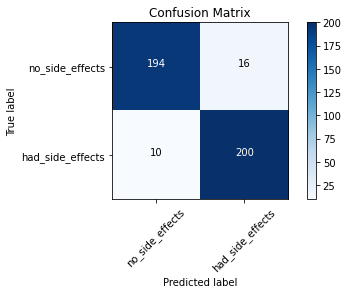

In [ ]:
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

* Sol üstten sağ alta doğru uzanan mavi hücreler, modelin doğru bir şekilde tahmin ettiği örnek sayısını içerir.
* Gördüğünüz gibi, bu, modelin tahminlerinde ne kadar iyi performans gösterdiğini görsel olarak yorumlamanın ve nerede biraz çalışmaya ihtiyaç duyabileceğini anlamanın iyi bir yoludur.

In [ ]:
print("Acc : %",(394/420)*100)

Acc : % 93.80952380952381


# Save And Load A Model

Keras modelini kaydetmenin birkaç farklı yolu vardır.
* Bir modeli eğitildikten sonra daha sonra kullanabilmek için mevcut durumunda kaydetmek istiyorsak, model üzerinde save() fonksiyonunu çağırabiliriz. Save() için, modeli kaydetmek istediğimiz dosyanın dosya yolunu ve adını h5 uzantılı olarak geçiyoruz.
    
    
    model.save('models/medical_trial_model.h5')

* Bu kaydetme yöntemi, modelle ilgili her şeyi - mimari, ağırlıklar, optimize edici, optimize edicinin durumu, öğrenme oranı, kayıp vb. her şeyi kaydedecektir.





**Artık bu modeli kaydettiğimize göre, modeli daha sonra yükleyebiliriz.**
* Yüklenen modelin, kaydedilen modelle aynı mimariye ve ağırlıklara sahip olduğunu, model üzerinde summary() ve get_weights()'i çağırarak doğrulayabiliriz.(model.optimizer,model.loss)

In [ ]:
from tensorflow.keras.models import load_model
new_model = load_model('models/medical_trial_model.h5')

* Yalnızca modelin mimarisini kaydetmemizin başka bir yolu var.
* Bunu model.to_json()'u çağırarak yapabiliriz. Bu, modelin mimarisini bir JSON dizesi olarak kaydedecektir.

In [ ]:
json_string = model.to_json()
json_string

from tensorflow.keras.models import model_from_json
#model_architecture = model_from_json(json_string)

* Son olarak modelin ağırlıklarını kaydetmek için
    
    
    model.save_weights('models/my_model_weights.h5')
* Daha sonra, kaydedilen ağırlıkları yeni bir modele yükleyebiliriz, ancak ağırlıkların yüklenebilmesi için yeni modelin eski modelle aynı mimariye sahip olması gerekir.

Daha Fazlası İçin :     
* https://elitedatascience.com/keras-tutorial-deep-learning-in-python
* https://www.tensorflow.org/tutorials/quickstart/beginner
* https://deeplizard.com/learn/playlist/PLZbbT5o_s2xrwRnXk_yCPtnqqo4_u2YGL
* https://www.datacamp.com/community/tutorials/deep-learning-python
